# IMPORTING DEPENDENCIES

In [126]:
import tensorflow as tf
import os

Limiting space for tensorflow

# Remove bad images

In [127]:
import cv2
import imghdr

In [128]:
data_dir = "data"

In [129]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [201]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in exts list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Isue with image {}".format(image_path))

NotADirectoryError: [Errno 20] Not a directory: 'data/.DS_Store'

# Loading data

In [131]:
import numpy as np
from matplotlib import pyplot as plt

In [132]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 2999 files belonging to 2 classes.


In [133]:
data_iterator = data.as_numpy_iterator()

In [134]:
batch = data_iterator.next()

In [135]:
batch[0].shape #shape of numpy array

(32, 256, 256, 3)

In [136]:
batch[1] 
#Class 1 = Scan with tumor
#Class 0 = Scan without tumor

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

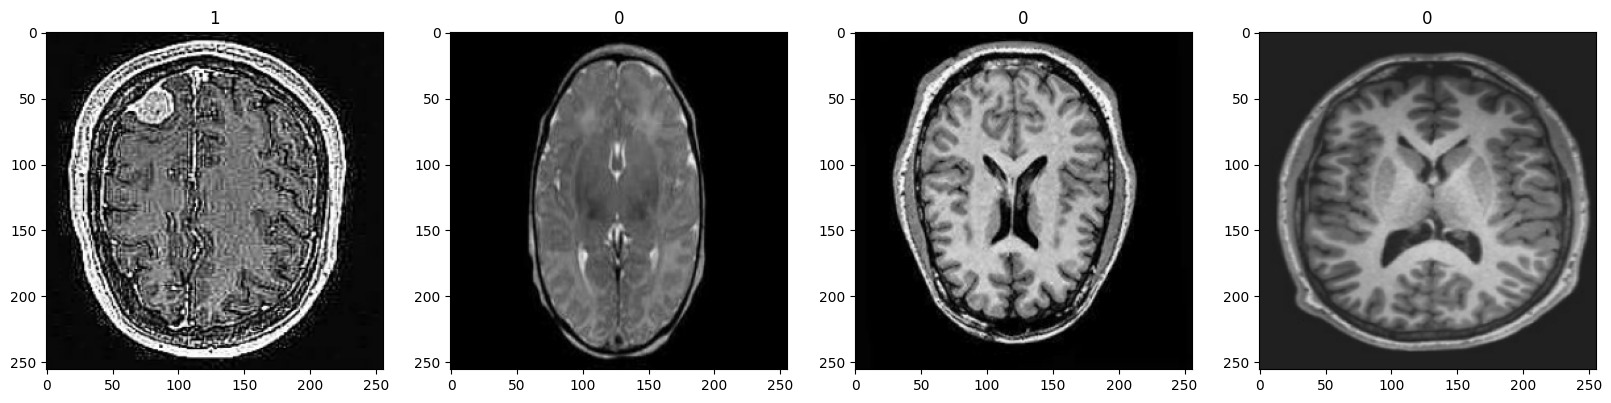

In [137]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing data

Scaling data

In [138]:
data = data.map(lambda x, y: (x/255, y))

In [139]:
scaled_iterator = data.as_numpy_iterator()

In [140]:
batch = scaled_iterator.next()

In [141]:
batch[0].max()

1.0

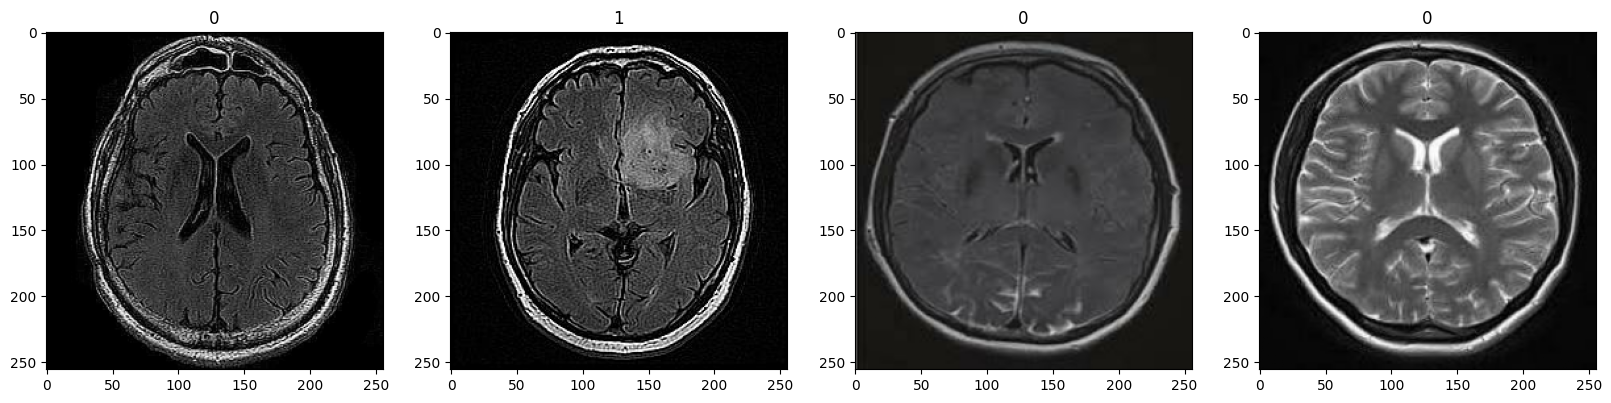

In [142]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Split data

In [143]:
len(data)

94

In [144]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [145]:
train_size+val_size+test_size

94

In [146]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep learning part

Building deep learning model

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import L2

In [148]:
model = Sequential()

In [149]:
#Adding layers
model.add(Conv2D(16, (3,3), 1, kernel_regularizer="l2", activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), 1, kernel_regularizer="l2", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(16, (3,3), 1, kernel_regularizer="l2", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, kernel_regularizer="l2", activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_regularizer="l2", activation="sigmoid"))

In [150]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [151]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 127, 127, 16)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 62, 62, 32)       

Training the model

In [152]:
logdir="logs"

In [153]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [154]:
hist = model.fit(train, epochs=12, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/12


2023-06-10 09:40:42.437089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - ETA: 0s - loss: 2.2903 - accuracy: 0.6558

2023-06-10 09:40:48.692300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 8s 110ms/step - loss: 2.2903 - accuracy: 0.6558 - val_loss: 1.0532 - val_accuracy: 0.7220
Epoch 2/12
65/65 [==============================] - 7s 109ms/step - loss: 0.9051 - accuracy: 0.7471 - val_loss: 0.8382 - val_accuracy: 0.7911
Epoch 3/12
65/65 [==============================] - 7s 109ms/step - loss: 0.7436 - accuracy: 0.7928 - val_loss: 0.7495 - val_accuracy: 0.8109
Epoch 4/12
65/65 [==============================] - 7s 110ms/step - loss: 0.6772 - accuracy: 0.8207 - val_loss: 0.6989 - val_accuracy: 0.8405
Epoch 5/12
65/65 [==============================] - 7s 109ms/step - loss: 0.5955 - accuracy: 0.8596 - val_loss: 0.5776 - val_accuracy: 0.8520
Epoch 6/12
65/65 [==============================] - 7s 109ms/step - loss: 0.5592 - accuracy: 0.8764 - val_loss: 0.6131 - val_accuracy: 0.8553
Epoch 7/12
65/65 [==============================] - 7s 109ms/step - loss: 0.5294 - accuracy: 0.8798 - val_loss: 0.5186 - val_accuracy: 0.8964
Epoch 8/12
65/65 

In [155]:
hist.history

{'loss': [2.2902889251708984,
  0.9050754904747009,
  0.7436205744743347,
  0.6771529912948608,
  0.5954609513282776,
  0.5591999888420105,
  0.5293611884117126,
  0.4997101426124573,
  0.4850415885448456,
  0.46879592537879944,
  0.5418882966041565,
  0.4729258120059967],
 'accuracy': [0.6557692289352417,
  0.7471153736114502,
  0.7927884459495544,
  0.8206730484962463,
  0.8596153855323792,
  0.8764423131942749,
  0.879807710647583,
  0.8932692408561707,
  0.8985576629638672,
  0.9057692289352417,
  0.893750011920929,
  0.901442289352417],
 'val_loss': [1.0531848669052124,
  0.8382369875907898,
  0.7494920492172241,
  0.6988523602485657,
  0.5775936245918274,
  0.6131173968315125,
  0.5186457633972168,
  0.5490911602973938,
  0.5010040402412415,
  0.5365815758705139,
  0.4658767282962799,
  0.45246240496635437],
 'val_accuracy': [0.7220394611358643,
  0.7911184430122375,
  0.8108552694320679,
  0.8404605388641357,
  0.8519737124443054,
  0.8552631735801697,
  0.8963815569877625,
  0.

Plotting the performance

<function matplotlib.pyplot.show(close=None, block=None)>

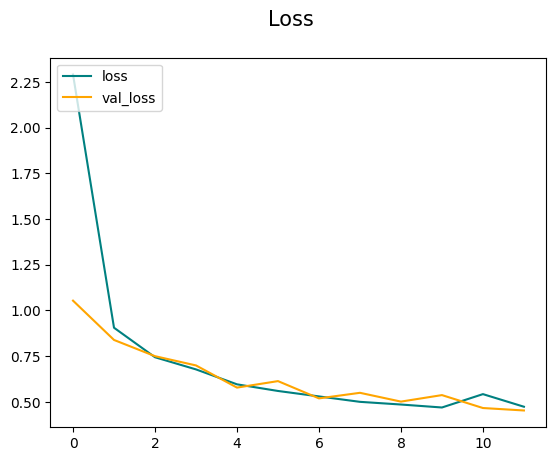

In [156]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=15)
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

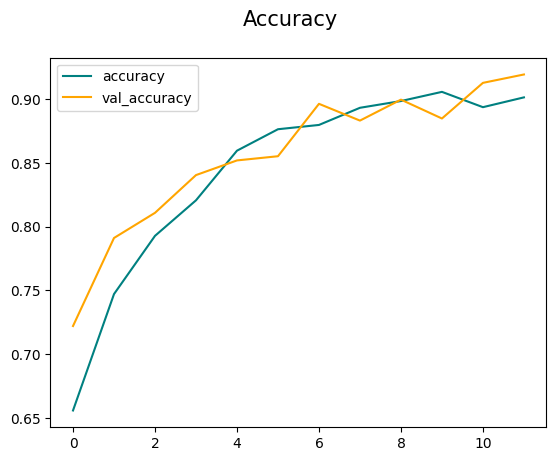

In [157]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=15)
plt.legend(loc="upper left")
plt.show

# Evaluating performance

Evaluate

In [158]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [159]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [160]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 16ms/step


2023-06-10 10:07:47.259863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 58ms/step


2023-06-10 10:07:47.962300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [162]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}")

Precision:0.916167676448822, Recall:0.9107142686843872, Accuracy:0.9067524075508118


Testing

In [188]:
import cv2

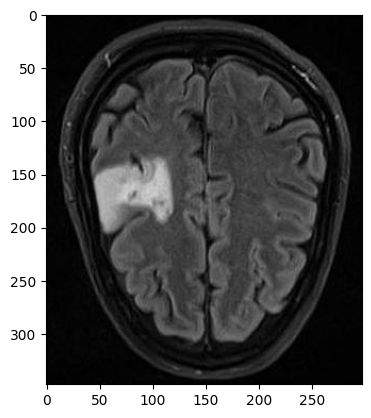

In [189]:
img = cv2.imread("y705.jpg")
plt.imshow(img)
plt.show()

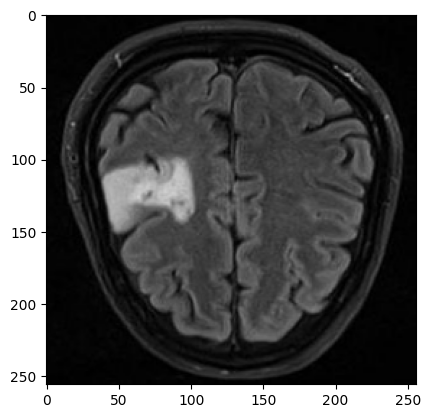

In [190]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [191]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [192]:
yhat

array([[0.77646947]], dtype=float32)

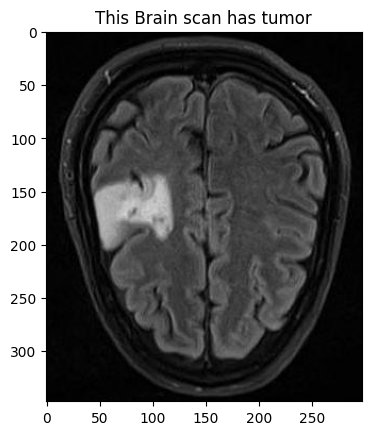

In [193]:
if yhat > 0.5:
    plt.imshow(img)
    plt.title("This Brain scan has tumor")
    plt.show()
else:
    plt.imshow(img)
    plt.title("This Brain scan has no tumor")
    plt.show()

# Saving the model

In [194]:
from tensorflow.keras.models import load_model

In [196]:
model.save(os.path.join("models", "Brain_Tumor_Detection_Model.h5"))

/Users/vaclavknapp/Desktop/Coding/ImageClassification/imageclassification/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Loading the model

In [197]:
new_model = load_model(os.path.join("models", "Brain_Tumor_Detection_Model.h5"))

In [198]:
new_model

In [199]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 57ms/step


2023-06-10 13:57:51.636448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0.77646947]], dtype=float32)